approval count : 2656
rejection count: 1613


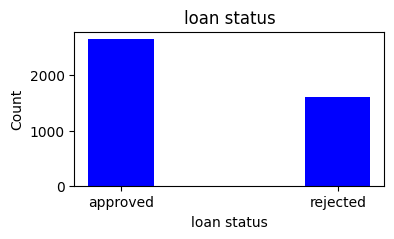

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
loan_prediction_details = pd.read_csv("/users/amulya/Downloads/loan_approval_dataset.csv")
loan_prediction_details.columns = loan_prediction_details.columns.str.strip()
loan_approval_count = loan_prediction_details[loan_prediction_details['loan_status'] == ' Approved'].shape[0]
loan_rejection_count = loan_prediction_details[loan_prediction_details['loan_status'] == ' Rejected'].shape[0]
print(f'approval count : {loan_approval_count}\nrejection count: {loan_rejection_count}')
loan_status = ['approved', 'rejected']
count = [loan_approval_count,loan_rejection_count]
plt.figure(figsize=(4,2))
plt.bar(loan_status, count, color = 'blue', width = 0.3)
plt.ylabel('Count') 
plt.xlabel('loan status')
plt.title('loan status')
plt.legend
plt.show()

total records : 4269, approx 60% of the loans are approved and 40% of the loans are rejected 

In [17]:
cibil_score = loan_prediction_details['cibil_score']
cibilScoreMean = loan_prediction_details['cibil_score'].mean()
cibilScoreMedian = loan_prediction_details['cibil_score'].median()
print(f"mean : {cibilScoreMean}\n median : {cibilScoreMedian}")
bins = [0, 300, 400, 500, 600,700,800,900]  # Add more bins as needed
labels = ['0-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900']
# Use pd.cut() within value_counts() to count the number of people in each cibil score
cibilscore_count = pd.cut(cibil_score, bins=bins, labels=labels, include_lowest=True).value_counts()
print(cibilscore_count)
approved_count = {label: 0 for label in labels}  
rejected_count = {label: 0 for label in labels}  
# Loop through each row in loan_prediction_details
for index, row in loan_prediction_details.iterrows():
    if row['loan_status'] == ' Approved':
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        approved_count[cibilscore_range] += 1
    else :
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected_count[cibilscore_range] += 1
for label, count in approved_count.items():
    print(f"cibilScore Range: {label}, Approved Loans: {count}")
for label, count in rejected_count.items():
    print(f"cibilScore Range: {label}, rejected loans : {count}")

mean : 599.9360505973295
 median : 600.0
cibil_score
500-600    738
700-800    734
300-400    701
600-700    700
400-500    694
800-900    691
0-300       11
Name: count, dtype: int64
cibilScore Range: 0-300, Approved Loans: 3
cibilScore Range: 300-400, Approved Loans: 69
cibilScore Range: 400-500, Approved Loans: 78
cibilScore Range: 500-600, Approved Loans: 392
cibilScore Range: 600-700, Approved Loans: 696
cibilScore Range: 700-800, Approved Loans: 730
cibilScore Range: 800-900, Approved Loans: 688
cibilScore Range: 0-300, rejected loans : 8
cibilScore Range: 300-400, rejected loans : 632
cibilScore Range: 400-500, rejected loans : 616
cibilScore Range: 500-600, rejected loans : 346
cibilScore Range: 600-700, rejected loans : 4
cibilScore Range: 700-800, rejected loans : 4
cibilScore Range: 800-900, rejected loans : 3


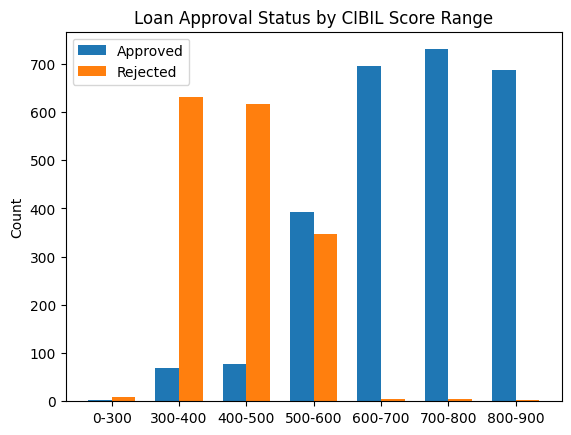

In [11]:
fig, ax = plt.subplots()
width = 0.35  # the width of the bars
x = np.arange(len(labels))

rects1 = ax.bar(x - width/2, approved_count.values(), width, label='Approved')
rects2 = ax.bar(x + width/2, rejected_count.values(), width, label='Rejected')

ax.set_ylabel('Count')
ax.set_title('Loan Approval Status by CIBIL Score Range')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

observation : from this we can assume if cibil score is high then loans get approved

loan approval count : 1318
loan rejected count : 801
approved with selfemployed : 1338
approved with selfemployed : 812


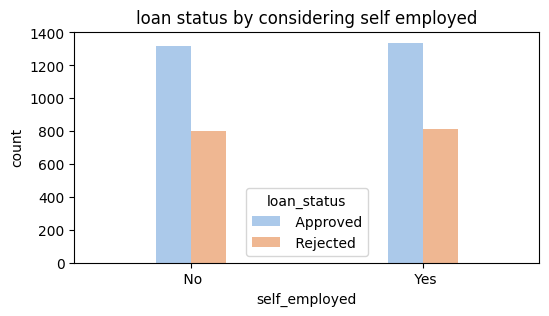

In [13]:
loan_prediction_details[loan_prediction_details['self_employed'] == ' Yes']
approved_count = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Approved') & (loan_prediction_details['self_employed'] == ' No')].shape[0]
rejected_count = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Rejected') & (loan_prediction_details['self_employed'] == ' No')].shape[0]
loan_approved = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Approved') & (loan_prediction_details['self_employed'] == ' Yes')].shape[0]
loan_rejected = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Rejected') & (loan_prediction_details['self_employed'] == ' Yes')].shape[0]
print(f'loan approval count : {approved_count}\nloan rejected count : {rejected_count}\napproved with selfemployed : {loan_approved}\napproved with selfemployed : {loan_rejected}')
plt.figure(figsize=(6, 3))
sns.countplot(x='self_employed', hue='loan_status', data=loan_prediction_details, palette='pastel', width = 0.3)
plt.title('loan status by considering self employed')
plt.show()

observation : self_employement is not effecting the loan status as there is no much difference 

cibil_score
500-600    738
700-800    734
300-400    701
600-700    700
400-500    694
800-900    691
0-300       11
Name: count, dtype: int64
cibilScore Range: 0-300, Approved Loans if self employed is no: 3
cibilScore Range: 300-400, Approved Loans if self employed is no: 30
cibilScore Range: 400-500, Approved Loans if self employed is no: 38
cibilScore Range: 500-600, Approved Loans if self employed is no: 196
cibilScore Range: 600-700, Approved Loans if self employed is no: 348
cibilScore Range: 700-800, Approved Loans if self employed is no: 361
cibilScore Range: 800-900, Approved Loans if self employed is no: 342
cibilScore Range: 0-300, rejected loans if self employed is yes: 3
cibilScore Range: 300-400, rejected loans if self employed is yes: 321
cibilScore Range: 400-500, rejected loans if self employed is yes: 312
cibilScore Range: 500-600, rejected loans if self employed is yes: 170
cibilScore Range: 600-700, rejected loans if self employed is yes: 2
cibilScore Range: 700-80

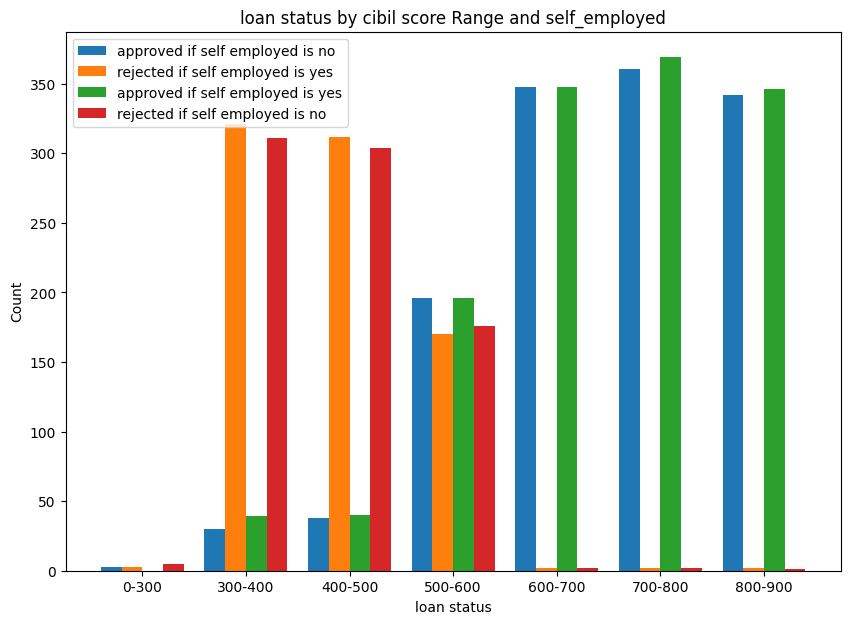

In [20]:
cibil_score = loan_prediction_details['cibil_score']
bins = [0, 300, 400, 500, 600,700,800,900]  # Add more bins as needed
labels = ['0-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900']
# Use pd.cut() within value_counts() to count the number of people in each cibil score
cibilscore_count = pd.cut(cibil_score, bins=bins, labels=labels, include_lowest=True).value_counts()
print(cibilscore_count)
approved_count = {label: 0 for label in labels}
rejected_count = {label: 0 for label in labels}
approved = {label: 0 for label in labels}
rejected = {label: 0 for label in labels}
# Loop through each row in loan_prediction_details
for index, row in loan_prediction_details.iterrows():
    if row['loan_status'] == ' Approved' and row['self_employed'] == ' No':
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        approved_count[cibilscore_range] += 1
    elif row['loan_status'] == ' Approved' and row['self_employed'] == ' Yes':
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        approved[cibilscore_range] += 1
    elif row['loan_status'] == ' Rejected' and row['self_employed'] == ' No':
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected[cibilscore_range] += 1
    elif row['loan_status'] == ' Rejected' and row['self_employed'] == ' Yes':
        cibilscore_range = pd.cut([row['cibil_score']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected_count[cibilscore_range] += 1
for label, count in approved_count.items():
    print(f"cibilScore Range: {label}, Approved Loans if self employed is no: {count}")
for label, count in rejected_count.items():   
    print(f"cibilScore Range: {label}, rejected loans if self employed is yes: {count}")
for label, count in approved.items():   
    print(f"cibilScore Range: {label}, approved loans if self empplyed is yes: {count}")
for label, count in rejected.items():   
    print(f"cibilScore Range: {label}, rejected loans if self empplyed is no: {count}")
fig, ax = plt.subplots(figsize=(10, 7))

ind = range(len(labels))
width = 0.2

p1 = plt.bar(ind, approved_count.values(), width, label='approved if self employed is no')
p2 = plt.bar([i + width for i in ind], rejected_count.values(), width, label='rejected if self employed is yes')

p3 = plt.bar([i + 2 * width for i in ind], approved.values(), width, label='approved if self employed is yes')
p4 = plt.bar([i + 3 * width for i in ind], rejected.values(), width, label='rejected if self employed is no')
plt.xlabel('loan status')
plt.ylabel('Count')
plt.title('loan status by cibil score Range and self_employed')
plt.xticks([i + 1.5 * width for i in ind], labels)
plt.legend()
plt.show()


observation : we can see approved loans if self employed is yes - 346, no - 342 where cibilscore is 800-900 so i can assume self emplyed is not much affecting the loan status

In [104]:
income_annum = loan_prediction_details['income_annum']
bins = [0, 100000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 1000000000]  # Add more bins as needed

# Create labels for each bin
labels = ['0-1000000', '1000000-2000000', '200000-3000000', '3000000-4000000', '4000000-5000000', '5000000-6000000', '6000000-7000000', '7000000-8000000', '8000000-9000000', '9000000-100000000']

# Use pd.cut() within value_counts() to count the number of people in each income range
income_counts = pd.cut(income_annum, bins=bins, labels=labels, include_lowest=True).value_counts()
print(income_counts)
approved_count = {label: 0 for label in labels}
rejected_count = {label: 0 for label in labels}
# Loop through each row in loan_prediction_details
for index, row in loan_prediction_details.iterrows():
    if row['loan_status'] == ' Approved':
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        approved_count[income_range] += 1
    else :
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected_count[income_range] += 1
for label, count in approved_count.items():
    print(f"Income Range: {label}, Approved Loans: {count}")
for label, count in rejected_count.items():
    print(f"Income Range: {label}, rejected loans : {count}")

income_annum
1000000-2000000      809
5000000-6000000      451
4000000-5000000      450
6000000-7000000      445
7000000-8000000      444
3000000-4000000      440
8000000-9000000      434
200000-3000000       425
9000000-100000000    371
0-1000000              0
Name: count, dtype: int64
Income Range: 0-1000000, Approved Loans: 0
Income Range: 1000000-2000000, Approved Loans: 532
Income Range: 200000-3000000, Approved Loans: 257
Income Range: 3000000-4000000, Approved Loans: 275
Income Range: 4000000-5000000, Approved Loans: 267
Income Range: 5000000-6000000, Approved Loans: 267
Income Range: 6000000-7000000, Approved Loans: 274
Income Range: 7000000-8000000, Approved Loans: 292
Income Range: 8000000-9000000, Approved Loans: 272
Income Range: 9000000-100000000, Approved Loans: 220
Income Range: 0-1000000, rejected loans : 0
Income Range: 1000000-2000000, rejected loans : 277
Income Range: 200000-3000000, rejected loans : 168
Income Range: 3000000-4000000, rejected loans : 165
Income Ra

In [10]:
labels = list(approved_counts)
approved_counts_list = list(approved_counts)
rejected_counts_list = list(rejected_counts)

# Set up positions for bar groups
bar_width = 0.2
bar_positions = np.arange(len(labels))

plt.figure(figsize=(20, 10))
# Create a bar plot
plt.bar(bar_positions - bar_width/2, approved_counts_list, bar_width, label='Approved Loans')
plt.bar(bar_positions + bar_width/2, rejected_counts_list, bar_width, label='Rejected Loans')

# Customize the plot
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Approved vs Rejected Loans by Income Range')
plt.xticks(bar_positions, labels, rotation=70)
plt.legend()

# Show the plot
plt.show()

NameError: name 'approved_counts' is not defined

In [105]:
approved_count = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Approved') & (loan_prediction_details['education'] == ' Graduate')].shape[0]
rejected_count = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Rejected') & (loan_prediction_details['education'] == ' Not Graduate')].shape[0]
loan_approved = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Approved') & (loan_prediction_details['education'] == ' Not Graduate')].shape[0]
loan_rejected = loan_prediction_details[(loan_prediction_details['loan_status'] == ' Rejected') & (loan_prediction_details['education'] == ' Graduate')].shape[0]
print(f'loan approval count : {approved_count}\nloan rejected count : {rejected_count}\napproved with selfemployed : {loan_approved}\napproved with selfemployed : {loan_rejected}')

loan approval count : 1339
loan rejected count : 808
approved with selfemployed : 1317
approved with selfemployed : 805


observation : self_employement is not effecting the loan status as there is no much difference 


In [107]:
income_annum = loan_prediction_details['income_annum']
bins = [0, 100000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 1000000000]  # Add more bins as needed

# Create labels for each bin
labels = ['0-1000000', '1000000-2000000', '200000-3000000', '3000000-4000000', '4000000-5000000', '5000000-6000000', '6000000-7000000', '7000000-8000000', '8000000-9000000', '9000000-100000000']

# Use pd.cut() within value_counts() to count the number of people in each income range
income_counts = pd.cut(income_annum, bins=bins, labels=labels, include_lowest=True).value_counts()
print(income_counts)
approved_count = {label: 0 for label in labels}
rejected_count = {label: 0 for label in labels}
approved = {label: 0 for label in labels}
rejected = {label: 0 for label in labels}
# Loop through each row in loan_prediction_details
for index, row in loan_prediction_details.iterrows():
    if row['loan_status'] == ' Approved' and row['education'] == ' Graduate':
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        approved_count[income_range] += 1
    elif row['loan_status'] == ' Rejected' and row['education'] == ' Graduate' :
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected_count[income_range] += 1
    elif row['loan_status'] == ' Approved' and row['education'] == ' Not Graduate' :
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        approved[income_range] += 1
    elif row['loan_status'] == ' Rejected' and row['education'] == ' Not Graduate' :
        income_range = pd.cut([row['income_annum']], bins=bins, labels=labels, include_lowest=True)[0]
        rejected[income_range] += 1
for label, count in approved_count.items():
    print(f"income Range: {label}, Approved Loans if a person graduate: {count}")
for label, count in rejected_count.items():   
    print(f"income Range: {label}, rejected loans if a person not graduate: {count}")
for label, count in approved.items():   
    print(f"income Range: {label}, approved loans if a person graduate: {count}")
for label, count in rejected.items():   
    print(f"income Range: {label}, rejected loans if a person not graduate: {count}")

income_annum
1000000-2000000      809
5000000-6000000      451
4000000-5000000      450
6000000-7000000      445
7000000-8000000      444
3000000-4000000      440
8000000-9000000      434
200000-3000000       425
9000000-100000000    371
0-1000000              0
Name: count, dtype: int64
income Range: 0-1000000, Approved Loans if a person graduate: 0
income Range: 1000000-2000000, Approved Loans if a person graduate: 278
income Range: 200000-3000000, Approved Loans if a person graduate: 115
income Range: 3000000-4000000, Approved Loans if a person graduate: 137
income Range: 4000000-5000000, Approved Loans if a person graduate: 146
income Range: 5000000-6000000, Approved Loans if a person graduate: 120
income Range: 6000000-7000000, Approved Loans if a person graduate: 148
income Range: 7000000-8000000, Approved Loans if a person graduate: 155
income Range: 8000000-9000000, Approved Loans if a person graduate: 130
income Range: 9000000-100000000, Approved Loans if a person graduate: 11

In [6]:
from sklearn import preprocessing
import scipy.stats as stats
import pandas as pd

loan_prediction_details = pd.read_csv("/users/amulya/Downloads/loan_approval_dataset.csv")
loan_prediction_details.columns = loan_prediction_details.columns.str.strip()
le = preprocessing.LabelEncoder()
loan_prediction_details['self_employed'] = le.fit_transform(loan_prediction_details['self_employed'])
loan_prediction_details['loan_status']= le.fit_transform(loan_prediction_details['loan_status'])
stats.pointbiserialr(loan_prediction_details['loan_status'], loan_prediction_details['cibil_score'])

SignificanceResult(statistic=-0.7705183649806971, pvalue=0.0)